In [1]:
# we should run things from the root project directory.
# so we need to add the project root to the path
import sys
from pprint import pprint
sys.path.append("../")
# print(sys.path)
# now we can import the utils
import src.parsers.utils as utils

pprint(utils.fetch_scene_keyframe_qa_pairs(1, 0, "behavior"))
pprint(utils.fetch_no_and_ids_of_keyframes(1)) # returns a dict with the number of keyframes and the ids of the keyframes



[{'A': 'The ego vehicle is slightly steering to the left. The ego vehicle is '
       'driving slowly.',
  'C': None,
  'Q': 'Predict the behavior of the ego vehicle.',
  'cluster': None,
  'con_down': None,
  'con_up': None,
  'layer': None}]
{'keyframes_ids': ['4711bcd34644420da8bc77163431888e',
                   '1e3d79dae62742a0ad64c91679863358',
                   'aa581aac963a4fad848ac11fe66e8637',
                   '4246e57f018745c9b2bc68feb3d71b58',
                   '378a3a3e9af346308ab9dff8ced46d9c',
                   'b73152cab88f49d9ba195da81fde1809',
                   '88449a5cb1644a199c1c11f6ac034867',
                   'e0845f5322254dafadbbed75aaa07969'],
 'no_of_keyframes': 8}


perception, prediction, planning, behavior, total
59 29 18 1 107
totals:  59 29 18 1 107
--------------------------------
perception, prediction, planning, behavior, total
69 28 17 1 222
totals:  128 57 35 2 222
--------------------------------
perception, prediction, planning, behavior, total
48 29 19 1 319
totals:  176 86 54 3 319
--------------------------------
perception, prediction, planning, behavior, total
64 31 18 1 433
totals:  240 117 72 4 433
--------------------------------
perception, prediction, planning, behavior, total
64 34 24 1 556
totals:  304 151 96 5 556
--------------------------------
perception, prediction, planning, behavior, total
56 24 14 1 651
totals:  360 175 110 6 651
--------------------------------
perception, prediction, planning, behavior, total
69 34 25 1 780
totals:  429 209 135 7 780
--------------------------------
perception, prediction, planning, behavior, total
56 38 29 1 904
totals:  485 247 164 8 904
--------------------------------


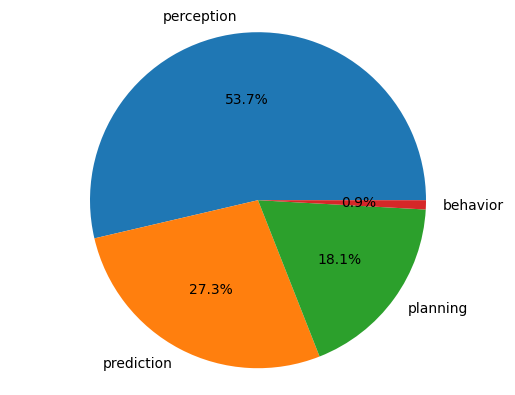

In [12]:
# get a pie chart of qa_pair types for a scene
import matplotlib.pyplot as plt
import src.parsers.utils as utils

# for a given scene there may be multiple keyframes.
# for a given keyframe there will be 4 types of qa_pairs- perception, prediction, planning, and behviour.
# for a given qa_pair type there may be multiple qa_pairs.
# I want to get a pie chart that depicts the qa type distribution for a given scene- for all keyframes.
# so first we need to get all the keyframes for a given scene.
keyframe_info = utils.fetch_no_and_ids_of_keyframes(1)
list_of_keyframe_ids = keyframe_info["keyframes_ids"]

# now we need to get the total number of qa_pairs for each keyframe.        
# we will store the totals in a dict


def get_qa_pair_distribution_for_scene(scene_identifier, keyframe_info, list_of_keyframe_ids):
    qa_pair_distribution_for_scene = {
    "perception": 0,
    "prediction": 0,
    "planning": 0,
    "behavior": 0,
    "total": 0
}

    for i in range(keyframe_info["no_of_keyframes"]):
        # i = 6
        keyframe_id = list_of_keyframe_ids[i]
        qa_pairs_perception = len(utils.fetch_scene_keyframe_qa_pairs(scene_identifier, i, "perception"))
        qa_pairs_prediction = len(utils.fetch_scene_keyframe_qa_pairs(scene_identifier, i, "prediction"))
        qa_pairs_planning = len(utils.fetch_scene_keyframe_qa_pairs(scene_identifier, i, "planning"))
        qa_pairs_behavior = len(utils.fetch_scene_keyframe_qa_pairs(scene_identifier, i, "behavior"))
        qa_pair_distribution_for_scene["perception"] += qa_pairs_perception
        qa_pair_distribution_for_scene["prediction"] += qa_pairs_prediction
        qa_pair_distribution_for_scene["planning"] += qa_pairs_planning
        qa_pair_distribution_for_scene["behavior"] += qa_pairs_behavior
        qa_pair_distribution_for_scene["total"] += qa_pairs_perception + qa_pairs_prediction + qa_pairs_planning + qa_pairs_behavior
        print("perception, prediction, planning, behavior, total")
        print(qa_pairs_perception, qa_pairs_prediction, qa_pairs_planning, qa_pairs_behavior, qa_pair_distribution_for_scene["total"])
        print("totals: ", qa_pair_distribution_for_scene["perception"], qa_pair_distribution_for_scene["prediction"], qa_pair_distribution_for_scene["planning"], qa_pair_distribution_for_scene["behavior"], qa_pair_distribution_for_scene["total"])
        print("--------------------------------")
    return qa_pair_distribution_for_scene

qa_pair_distribution_for_scene = get_qa_pair_distribution_for_scene(1, keyframe_info, list_of_keyframe_ids)

# get pie chat distribution for a scene 
labels = ['perception', 'prediction', 'planning', 'behavior']
sizes = [qa_pair_distribution_for_scene["perception"], qa_pair_distribution_for_scene["prediction"], qa_pair_distribution_for_scene["planning"], qa_pair_distribution_for_scene["behavior"]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()



In [14]:
# get get_qa_pair_distributions for all scenes- a cumulative distribution
qa_pair_distribution_for_all_scenes = {}
for i in range(1, 7):
    print("scene: ", i)
    keyframe_info = utils.fetch_no_and_ids_of_keyframes(i)
    list_of_keyframe_ids = keyframe_info["keyframes_ids"]
    scene_distribution = get_qa_pair_distribution_for_scene(i, keyframe_info, list_of_keyframe_ids)
    
    # Add the values from this scene to the cumulative distribution
    for qa_type, count in scene_distribution.items():
        if qa_type in qa_pair_distribution_for_all_scenes:
            qa_pair_distribution_for_all_scenes[qa_type] += count
        else:
            qa_pair_distribution_for_all_scenes[qa_type] = count

print(qa_pair_distribution_for_all_scenes)

scene:  1
perception, prediction, planning, behavior, total
59 29 18 1 107
totals:  59 29 18 1 107
--------------------------------
perception, prediction, planning, behavior, total
69 28 17 1 222
totals:  128 57 35 2 222
--------------------------------
perception, prediction, planning, behavior, total
48 29 19 1 319
totals:  176 86 54 3 319
--------------------------------
perception, prediction, planning, behavior, total
64 31 18 1 433
totals:  240 117 72 4 433
--------------------------------
perception, prediction, planning, behavior, total
64 34 24 1 556
totals:  304 151 96 5 556
--------------------------------
perception, prediction, planning, behavior, total
56 24 14 1 651
totals:  360 175 110 6 651
--------------------------------
perception, prediction, planning, behavior, total
69 34 25 1 780
totals:  429 209 135 7 780
--------------------------------
perception, prediction, planning, behavior, total
56 38 29 1 904
totals:  485 247 164 8 904
--------------------------------

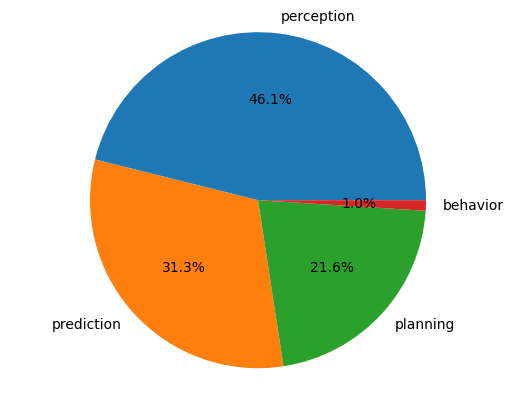

In [15]:
# get pie chart of qa_pair_distribution_for_all_scenes

labels = ['perception', 'prediction', 'planning', 'behavior']
sizes = [qa_pair_distribution_for_all_scenes["perception"], qa_pair_distribution_for_all_scenes["prediction"], qa_pair_distribution_for_all_scenes["planning"], qa_pair_distribution_for_all_scenes["behavior"]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()
